In [386]:
# Import relevant packages
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import math
import numpy as np
import pandas as pd

# Other magic commands
%matplotlib inline

C:\Users\jolsu\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`


Text(2008-09-30 00:00:00, 104649, 'Great Recession')

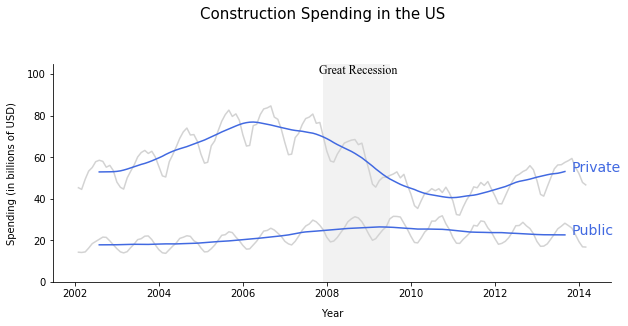

In [388]:
## Read in file
df_cnstrn = pd.read_csv('ConstructionTimeSeriesDataV2.csv')


## Manipulate data

# Set date range of the monthly data from 'Month-Year' column
df_cnstrn.index = pd.date_range(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = len(df_cnstrn['Private Construction']))

# Calculate moving average for both Private and Public Constructions totals
df_cnstrn['Private MovAvg'] = np.NaN
df_cnstrn['Public MovAvg'] = np.NaN
window = 12
window = window - window % 2
for i in range(int(window/2),df_cnstrn.shape[0]-int(window/2)):
    df_cnstrn.loc[df_cnstrn.index[i],'Private MovAvg'] = (0.5*df_cnstrn.iloc[i - int(window/2)]['Private Construction'] + df_cnstrn.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df_cnstrn.iloc[i + int(window/2)]['Private Construction'])/float(window)
    df_cnstrn.loc[df_cnstrn.index[i],'Public MovAvg'] = (0.5*df_cnstrn.iloc[i - int(window/2)]['Public Construction'] + df_cnstrn.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*df_cnstrn.iloc[i + int(window/2)]['Public Construction'])/float(window)

    
## Plotting

# Set number of categories from the data to be graphed
cats = ['Private', 'Public']


# General aesthetics of graph
fig, ax = plt.subplots()

ax.set_ylabel('Spending (in billions of USD)', labelpad=10, size=10)
ax.set_xlabel('Year', labelpad=10, size = 10)
fig.suptitle('Construction Spending in the US', size = 15, y = 1.08)
ymax = max(max(df_cnstrn['Private Construction']), max(df_cnstrn['Public Construction'])) + 20000
ax.set_ylim(0, ymax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

formatter = ticker.FuncFormatter(lambda x, p: format(int(x/1000), ','))
ax.yaxis.set_major_formatter(formatter)

fig.set_size_inches(10,4)

# Plot number of categories in one set of graph axes
numLines = len(cats)
drop_na = np.NaN
for i in range(numLines):
    
    # Plot spend data per Construction category
    ax.plot(df_cnstrn.index, df_cnstrn[cat[i] + str(" Construction")], color='lightgrey')

    # Drop NaN values to allow for plotting of moving averages
    drop_na = df_cnstrn.dropna(how='any')
    
    # Plot moving average of spend data per Construction category
    ax.plot(drop_na.index, drop_na[cat[i] + str(" MovAvg")], color='royalblue')
    
    # Set appropriate data labels with appropriate buffered positioning
    ax.text(max(drop_na.index)+2, drop_na[cat2[i]][drop_na.count()[0]-1], cat[i], color='royalblue', size=14)

    
## Additional plotting aesthetics
    
# Shade timespans of notable periods in history which exist or provide notable insight into the data involved
notableName = "Great Recession"
notableTime = {'start':'2007-11-30', 'end':'2009-06-30'}

# Position notableName in the center of the timepsan provided
df_notableSpan = df_cnstrn.loc[(df_cnstrn.index > notableTime['start']) & (df_cnstrn.index < notableTime['end'])]
textPosition = math.trunc(len(df_notableSpan) /2)
textPosition = df_notableSpan.index[textPosition]

ax.axvspan(notableTime['start'],notableTime['end'], facecolor='k',alpha=0.05)
ax.text(textPosition, ymax, notableName, color = 'k',fontsize=12,verticalalignment='top',horizontalalignment='center',fontname='Times New Roman')


The graph above shows a breakout of private and public construction spending in the United States between 2002 and into the first quarter of 2014.

Between the two sectors, while showing strong correlation in annual seasonality (grey), show a noticeable difference in the volatility of their trend, or moving averages (blue). In this graph, this difference is most apparent during the Great Recession, wherein private construction spending was heavily affected, while public spending remained relatively unphased and, in fact, conversely grew. In addition, spending in public and private sectors begins to converge during and shortly after the Great Recession as private sector sending plummets and public sector spending grows. Thereafter, spending begins to diverge between the two sectors as the private sector begins to seemingly recover.

This graph gives a slight glimpse into the fortitude of the public sector amidst a financial downturn, and could furthermore beg the question of if this remaining true across all a) notable financial downturns in history and b) segments of the public sector apart from construction spending.